# ASTR 5490: Homework 2 (Time-Domain Astronomy / Fourier Transforms)

## 1) Experimenting with Fourier Components
## $S(t) = C_0 + C_1\cos\left(1\frac{2\pi(t-t_0)}{P}\right) + C_2\cos\left(2\frac{2\pi(t-t_0)}{P}\right) + C_3\cos\left(3\frac{2\pi(t-t_0)}{P}\right) + ...$

In [103]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from itertools import cycle

In [121]:
# Class to calculate Fourier components
class Fourier:
    
    # Initialize the instance of this Class with the following properties
    def __init__(self,c,period=1.0,t0=0.0):
        # Inputs
        #    c: list of coefficients in front of Fourier components
        #    period: period of signal (default is 1)
        #    t0: reference time for signal (default is 0)
        
        # Define list of coefficients
        self.c = c
        
        # Calculate renormalization factor
        self.R = np.sum(c)
        
        # Define period and reference time
        self.period = period
        self.t0 = t0
        
        # Make a list of times to evaluate signal at (2 periods)
        self.t = np.linspace(-1*period,1.5*period,100)

    # Function to calcuate signal
    def FourierSignal(self):
        #    Value of signal as a function of time

        # Calculate phase of Fourier components
        phase = [2*np.pi*(t-self.t0)/self.period for t in self.t]

        # Calculate value of signal
        S = [1/self.R*self.c[0] + self.c[1]*np.cos(1*phase) + self.c[2]*np.cos(2*phase) + self.c[3]*np.cos(3*phase) + self.c[4]*np.cos(4*phase) for phase in phase]

        return(self.c,self.t,S)
    
    # Function to plot signal vs. time
    def FourierPlotter(self,linestyle):
        
        c,t,S = self.FourierSignal()
        
        # Plot signal vs. time
        ax = plt.subplot(111)

        # Label legend with whichever coefficent is 1
        for i in range(len(c)):
            if c[i] == 1:
                label = r'$C_{0}={1}$'.format(i,c[i])
        ax.plot(t,S,label=label,linestyle=linestyle)

        # Add plot labels
        ax.set_xlabel('time (period)',fontsize=14)
        ax.set_ylabel('S(t)',fontsize=14)
        ax.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12)
        ax.set_title('Signal vs. Time',fontsize=18)

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

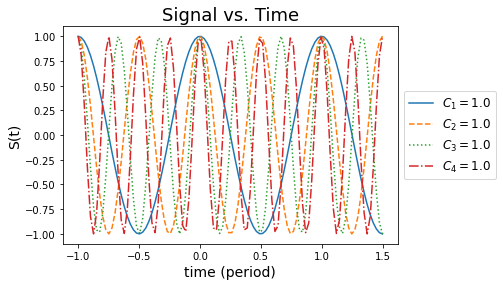

In [122]:
# Make a list of Fourier coefficients so they're all 0
c = np.zeros(5)

# Make list of linestyles
linsty = ['solid','dashed','dotted','dashdot']

# Loop over each coefficient
for i in range(1,len(c)):
    
    # Set different cofficient equal to 1
    c[i] = 1

    # Creat instance of class for this set of coefficients and plot form of Fourier component
    fourier = Fourier(c)
    fourier.FourierPlotter(linsty[i-1])
    
    # Reset particular coefficient to 1 for next loop
    c[i] = 0

In [ ]:
c = 